# Linear Regression & Backpropagation (lan truyền ngược)

## 1. Linear Regression

Các bước trong Linear Regrssion:
* 1. Chuẩn bị và xử lý dữ liệu
* 2. Xây dựng mô hình
Mô hình tổng quát của Linear Regression:
$$ h_{\theta} = \theta_{0}x_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_{n}$$
trong đó $\theta = (\theta_{0}, \theta_{1},...,\theta_{n})$ là bộ tham số và $x = (x_0, x_1,..., x_n)$,  $h_\theta(x)$ là giá trị tiên đoán và dựa vào bộ tham số $\theta$ và mẫu dữ liệu x.
* 3. Xây dựng hàm loss
Mục đích của hàm `loss` nhằm đo mức độ khác biết (khoảng cách) giữa giá trị tiên đoán $h_\theta(x)$ với giá trị thực y. Hàm loss phổ biến cho bài toán Linear Regression là hàm bình phương độ lệch:
$$ J(x,y;\theta) = (h_\theta(x) - y)^{2}$$
Khi muốn tính giá trị los cho toàn bộ tập dữ liệu, chungs ta tính giá trị loss trung bình như sau:
$$ \displaystyle J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
trong đó, $(x^{(i)},y^{(i)})$ là mẫu dữ liệu thứ $i^{th}$ trong bộ dữ liệu gồm m mẫu dữ liệu.
Chú ý, ở một số tài liệu, công thức tính giá trị loss trung bình ở trên còn chia thêm cho 2 như $ \displaystyle J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$ . Việc có chia cho 2 hay không không ảnh hưởng đến quá trình huấn luyện.
* 4. Tìm bộ tham số dùng giải thuật Bachpropagation

Bước đầu tiên là khởi tạo giá trị cho bộ tham số θ. Thông thường bộ tham số được khởi tạo với các giá trị nhỏ và ngẫu nhiên. Cụ thể, các giá trị ngẫu nhiên theo phân bố chuẩn (normal distribution) thường được sử dụng để khởi tạo giá trị cho bộ tham số.

Tiếp đó, các bước tính feed-forward, tính loss, tính đạo hàm cho từng tham số, và cập nhật tham số được thực hiện lặp đi lặp lại cho đến khi nào đạt đến điều kiện dừng. Điều kiện dừng thường là số lần sử dụng (duyệt qua) bộ dữ liệu. Một lần duyệt qua hết các mẫu trong bộ dữ liệu được gọi là một epoch.

– Tính feed-forward cho mẫu thứ ith trong bộ dữ liệu

$$h_\theta(x(^{(i)})=\theta_0x^{(i)}_0 +\theta_1x^{(i)}_1 + ... +\theta_kx^{(i)}_k$$
– Tính giá trị loss trung bình cho m mẫu dữ liệu

$$ \displaystyle J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
– Tính đạo hàm cho từng tham số

$$  \frac{\partial J(\theta)}{\partial \theta_j}= \frac{2}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
– Cập nhật tham số

$$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

trong đó $\alpha$ là learning rate  và là giá trị được xác định trước.

Khi đọc các 4 công thức bên trên, các bạn cần phân biệt các biến ở dạng vector (như $x^{(i)},y^{(i)}$ và biến thông thường (như $\theta_j,x^{(i)}_j)$.



## 2. Ví dụ áp dụng trong dự đoán giá nhà

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(20, 1)


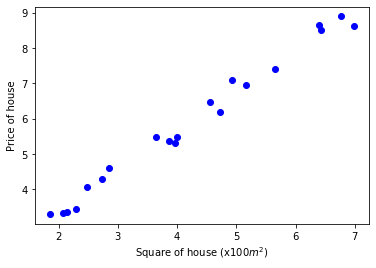

In [55]:
#Xử lý data
dataframe = pd.read_csv("my_house_price_prediction.csv", header=None)
# print(dataframe)
data = dataframe.values

m = data.shape[0] #number of data
X = data[:,0]
y = data[:,1:]
X_train = np.concatenate(( np.ones((m,1)),X.reshape(-1,1)), axis=1)
print(y.shape)

plt.plot(X, y, 'bo')
plt.xlabel("Square of house (x100$m^2$)")
plt.ylabel("Price of house")
plt.show()


In [56]:
def batch_gradient_descent():
    n_interations = 50
    learning_rate = 0.01
    
    #Initializing
    thetas = np.random.randn(2,1)
    theta_path = [thetas]
    losses = []
    
    for i in range(n_interations):
        #compute output
        h_x = np.dot(X_train, thetas)
        
        #compute loss
        loss = (h_x - y)**2
        
        #derivative loss
        loss_grd = 2*(h_x - y)/m
        
        #derviative for parameter
        gradients = np.dot(X_train.T, loss_grd)
        
        #update theta
        thetas = thetas - learning_rate*gradients
        theta_path.append(thetas)
        
        mean_loss = np.sum(loss)/m
        losses.append(mean_loss)
        
    return theta_path, losses


[[-0.41379863]
 [ 1.45170845]]


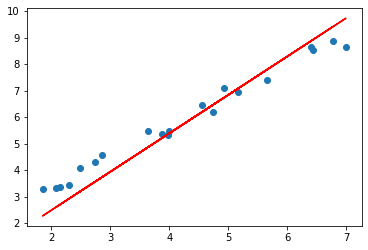

In [59]:
bgd_thetas, losses = batch_gradient_descent()

plt.scatter(X,y)
data_y = X*bgd_thetas[-1][1] + bgd_thetas[-1][0]
print(bgd_thetas[-1])
plt.plot(X, data_y, color='r')
plt.show()